<a href="https://colab.research.google.com/github/Shantesh123/Command_Line_Testing/blob/main/Copy_of_!pip_install_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet

In [38]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [17]:
df_mercado_trends

,Search Trends,DayOfWeek
Date,,
2016-06-01 00:00:00,97,2
2016-06-01 01:00:00,92,2
2016-06-01 02:00:00,76,2
2016-06-01 03:00:00,60,2
2016-06-01 04:00:00,38,2
...,...,...
2020-09-07 20:00:00,71,0
2020-09-07 21:00:00,83,0
2020-09-07 22:00:00,96,0


<Axes: xlabel='Date'>

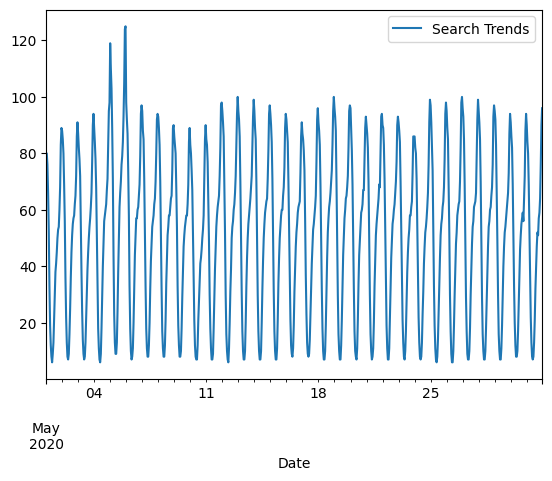

In [40]:
df_mercado_trends_may = df_mercado_trends.loc["2020-05-01":"2020-05-31"]

# Review the df_spotlight DataFrame
df_mercado_trends_may.plot()

In [41]:
traffic_may_2020=df_mercado_trends_may.sum()
traffic_may_2020

Search Trends    38181
dtype: int64

In [42]:
monthly_median_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()
print(monthly_median_traffic)

Search Trends    35172.5
dtype: float64


In [43]:
comparison_ratio =traffic_may_2020 / monthly_median_traffic
print(comparison_ratio)

Search Trends    1.085536
dtype: float64


<Axes: xlabel='HourOfDay'>

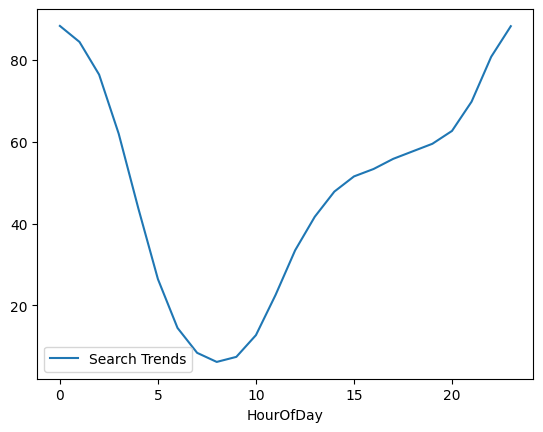

In [44]:
df_mercado_trends['HourOfDay'] = df_mercado_trends.index.hour

#group by day of week
average_traffic_by_hour = df_mercado_trends.groupby('HourOfDay').mean()
average_traffic_by_hour.plot()

<Axes: xlabel='DayOfWeek'>

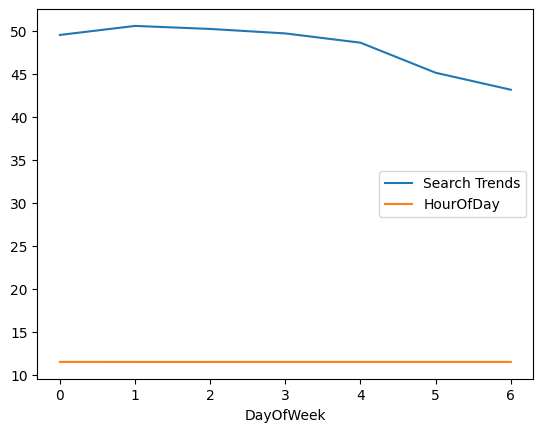

In [45]:
df_mercado_trends['DayOfWeek'] = df_mercado_trends.index.dayofweek

#group by day of week
average_traffic_by_day = df_mercado_trends.groupby('DayOfWeek').mean()
average_traffic_by_day.plot()

<ipython-input-46-477891c9e59e>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_mercado_trends['WeekOfYear'] = df_mercado_trends.index.week


<Axes: xlabel='WeekOfYear'>

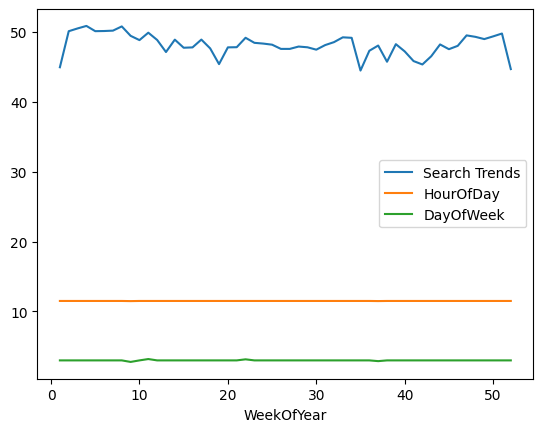

In [46]:
# Group the hourly search data to plot the average traffic by the week of the year
df_mercado_trends['WeekOfYear'] = df_mercado_trends.index.week
average_traffic_by_week = df_mercado_trends.groupby('WeekOfYear').mean()
average_traffic_by_week.plot()
#average_traffic_by_week.plot()

**Question:** Are there any time based trends that you can see in the data?

**Answer: Yes, we can observe that during late afternoon to evenings the search increases signifucantly and also during the early start of the week the search is high and tapers down as the week progresses
the search for the entire year is mostly avegraged out but you can see drops during certain times

In [47]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


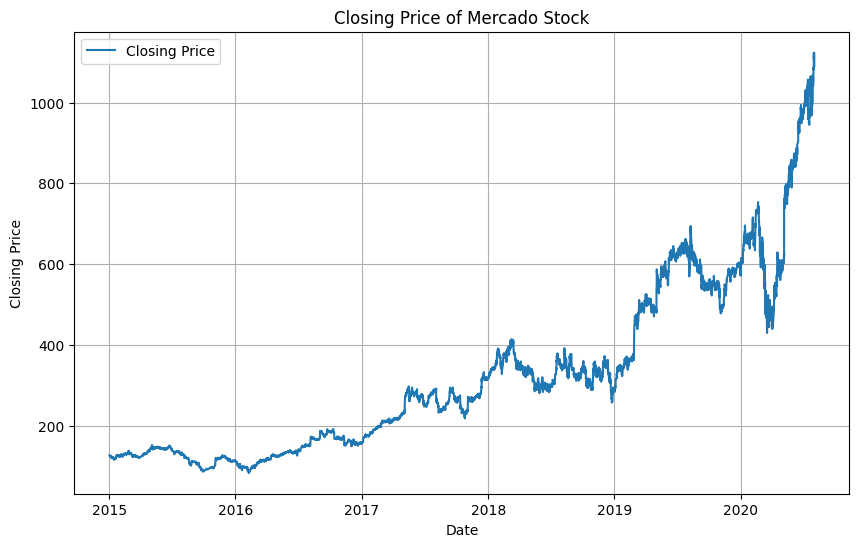

In [48]:

# Set the date as the index and drop rows with missing values

# Extract the closing price column
closing_prices = df_mercado_stock["close"]

# Create a line plot of the closing prices
plt.figure(figsize=(10, 6))
plt.plot(closing_prices, label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price of Mercado Stock")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

display(df_combined.head())
display(df_combined.tail())

NameError: name 'pd' is not defined

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# plt.plot(df_combined["close"], label="Close Price",axes=ax1)

# plt.plot(df_combined["Search\ Trends"], label="Search Trends",axes=ax2)

# plt.title("Mercado Stock Price and Search Trends")
# plt.xlabel("Date")
# plt.ylabel("Close Price")
# plt.legend()

# plt.grid(True)
# plt.show()
df_mercado_stock.plot(ax=ax1, c="blue")
df_mercado_trends["Search Trends"].plot(ax=ax2, c="orange")




NameError: name 'plt' is not defined

In [2]:
# Shift the Search Trends column by one hour
df_mercado_trends['Lagged Search Trends'] = df_mercado_trends['Search Trends'].shift(1)

# Display the updated DataFrame
print(df_mercado_trends)

NameError: name 'df_mercado_trends' is not defined